In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Orthonormal periodic basis functions

The purpose of this exercise is to familarize yourself with orthonormal periodic basis functions. 
Let us consider signals sampled on the interval $n \in [0,N-1]$.
The **fundamental frequency** functions are given by


$$f_1(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left( 2\pi \frac{1}{N}n \right)  $$

$$g_1(n) = \frac{\sqrt{2}}{\sqrt{N}}\sin \left( 2\pi \frac{1}{N}n \right)  $$

These are periodic with $f_1(n+N)=f_1(n), \ g_1(n+N)=g_1(n)$. 

The **higher harmonics** are given by

$$f_k(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left(2\pi  \frac{k }{N}n \right) $$

$$g_k(n) = \frac{\sqrt{2}}{\sqrt{N}}\sin \left(2\pi  \frac{k }{N}n \right)  $$

These are periodic with $f_k(n+\frac{N}{k})=f(n), \ g_k(n+\frac{N}{k})=g_k(n)$, i.e. their frequencies are $k$ times higher than the fundamental frequency. 

Recall the constant $\frac{\sqrt{2}}{\sqrt{N}}$ serves to normalize the length of the basis vectors to have unit length.

The range of $k$'s is $k=[0,N/2]$ for even $N$ and $k=[0,(N-1)/2]$ for odd. With $k=0$ we get the constant function

$$f_0(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left( \frac{2\pi 0}{N}n \right) = \frac{\sqrt{2}}{\sqrt{N}} $$

So in total we have precisely $N$ discrete sampled harmonic functions or vectors $\mathbf{v}_n$ if they are visualized as points in $\mathbb{R}^N$. 

The first vector $\mathbf{v}_0$ is the constant vector:
$$(\mathbf{v}_0)_n = \frac{\sqrt{2}}{\sqrt{N}}$$

The vectors $\mathbf{v}_1, \mathbf{v}_3, ...$ are the cosine-vectors and the vectors $\mathbf{v}_2, \mathbf{v}_4, ...$ are the sine-vectors:

$
\begin{align}
(\mathbf{v}_{2k-1})_n &= f_{k}(n) \\
(\mathbf{v}_{2k})_n &= g_{k}(n) 
\end{align}
$

for $k = 1, 2, ..., N/2$.

We have a complete orthonormal basis set! We can form a **basis matrix** $\boldsymbol{V}=\left( \mathbf{v}_0 \quad \mathbf{v}_1 \quad \mathbf{v}_2 \quad ... \quad \mathbf{v}_{N-1} \right)^T$ where $\|\mathbf{v}\|=1$.


### Exercise 1: Changing domains

We will $use$ the following simulated signal

$$f(n) = \cos\left(2\pi \frac{0.15}{fs}\right) + \frac12 \cos\left(2\pi \frac{1}{fs}\right) + \frac{1}{4} \cos\left(2\pi \frac{2}{fs}\right)\tag{1}$$

However, instead of observing the signal $f(n)$ directly, we assume we only have access to a noisy version of $f$:

$$y(n) = f(n) + \epsilon_n,\tag{2}$$

where $\epsilon_n \sim \mathcal{N}(0, 0.5^2)$.


 **1. Implement the signal using numpy**

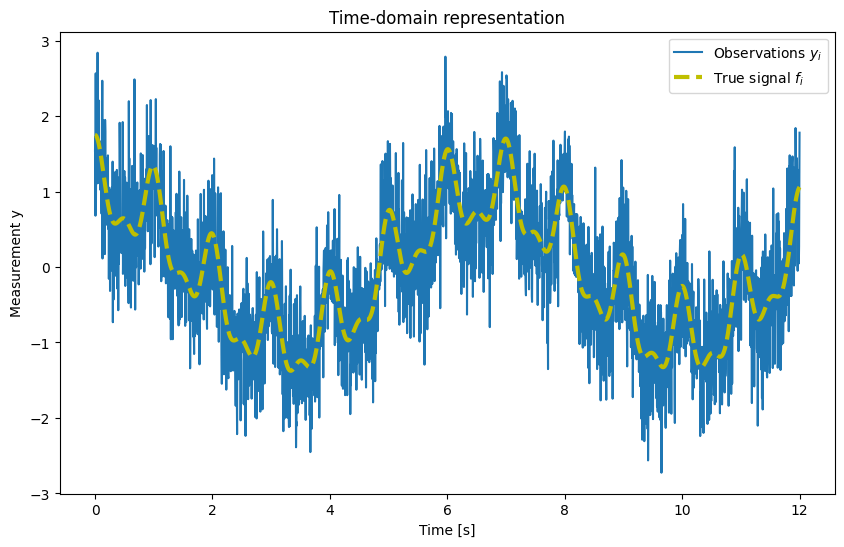

In [2]:
np.random.seed(2)

# length
N = 3001

# sample rate
fs = 250

# time vector
ns = np.arange(N)
ts = ns/fs

# create f
A0 = [1, 0.5, 0.25]
f0 = [0.15, 1, 2]
f = np.zeros(N)
for ai, fi in zip(A0, f0):
    f += ai*np.cos(2*np.pi*fi/fs*ns)
    
# simulate noisy observations
noise = np.random.normal(0, 0.5, size=N)
y = f + noise


fig = plt.figure(figsize=(10, 6))
plt.plot(ts, y, label='Observations $y_i$')
plt.plot(ts, f, 'y--', linewidth=3, label='True signal $f_i$')
plt.xlabel('Time [s]')
plt.ylabel('Measurement y')
plt.title('Time-domain representation')
plt.legend();

**2. Set-up the basis matrix (Optional)\* .**

In [3]:
# make sure we have an odd number N
assert N % 2 == 1

ns = np.arange(N)
V = np.zeros((N,N))

freqs = np.arange(int(0.5*N)+1)*fs/N

# first basis vector
V[:,0] = np.ones(N)

# remaining basis vectors
n_pairs = int((N-1)/2)
for k in range(1,n_pairs + 1):
    # in each column we are going to define cosine or sine function with frequency k
    V[:,2*k-1] = np.sqrt(2)*np.cos(2*np.pi*ns/N*k) ## at each step we are filling this is a column
    V[:,2*k] = np.sqrt(2)*np.sin(2*np.pi*ns/N*k)

# scale all vectors
V = V/np.sqrt(N)    


After we have defined our basis matrix $\mathbf{V}$, we can now compute the coordinates of a our signal $\mathbf{y}$ expressed in the basis $\mathbf{V}$:

$$\mathbf{z} = \mathbf{V}^T \mathbf{y}$$

Recall that the coefficients of $\mathbf{z}$ is ordered as follows

$$\mathbf{z} = \left[a_0 \quad a_1 \quad b_1 \quad a_2 \quad b_2 \quad ... a_{K} \quad b_{K}\right]^T$$

where 
$$\begin{align*}
		y(n) &= a_0 + a_1\cos(2\pi \frac{1}{N} n) + b_{1}\sin(2\pi \frac{1}{N} n)+ a_2\cos(2\pi \frac{2}{N} n) + b_{2}\sin(2\pi \frac{2}{N} n) + ...\\
		&= a_0 + \sum_{k=1}^K  \left[a_k\cos(2\pi \frac{k}{N} n) + b_k\sin(2\pi \frac{k}{N} n)\right]\\
		\end{align*}
$$
**3. Compute the coordinates of the signal $\mathbf{y}$ expressed in the basis $\mathbf{V}$**

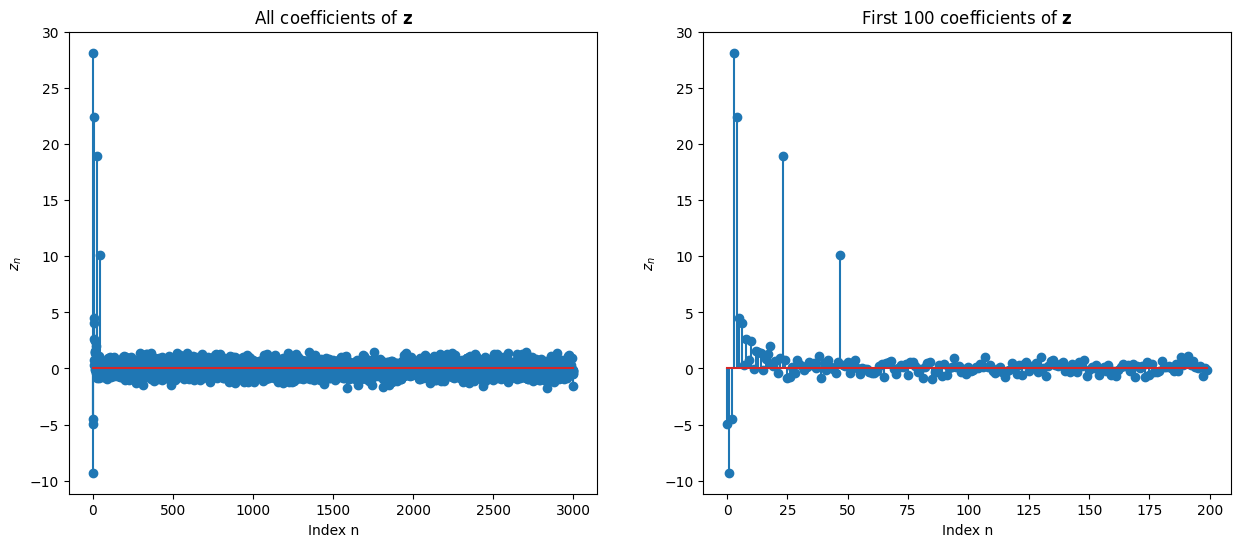

In [4]:
z = V.T@y

plt.figure(figsize=(15, 6))
ax = plt.subplot(1, 2, 1)
plt.stem(z)
plt.xlabel('Index n')
plt.ylabel('$z_n$')
plt.title('All coefficients of $\mathbf{z}$')


plt.subplot(1, 2, 2)
plt.stem(z[:200])
plt.xlabel('Index n')
plt.ylabel('$z_n$')
plt.title('First 100 coefficients of $\mathbf{z}$');


### Exercise 2: Computing the energy of the signal

The energy of a signal from $n=0$ to $N$ is given by

$$E = \sum_{n=0}^N f(n)^2$$

*We have seen that the energy can be computed in the time-domain as well as in the frequency-domain with the same result.*

 **1. Calculate the energy of the signal in both the time and frequency domains**

In [5]:
E_time = np.sum(y**2)
E_freq = np.sum(z**2)

print('Energy (time  domain): %3.2f' % E_time)
print('Energy (freq. domain): %3.2f' % E_freq)

Energy (time  domain): 2700.86
Energy (freq. domain): 2700.86


### Exercise 3: Computing the amplitude spectrum


It is often more convenient to combine the cosine and sine pair for each frequency into a single harmonic function as follows:

$\begin{align*}
		y(n) &= a_0 + \sum_{k=1}^K  c_k \cos\left(2\pi \frac{k}{N} n + \phi_k\right)
		\end{align*},
$

where $c_k = \sqrt{a_k^2 + b_k^2}$ and $\tan \phi_k = \frac{a_k}{b_k}$.



Therefore, we will now compute the amplitude spectrum $c_k = \sqrt{a^2_k + b^2_k}$ for $k \geq 1$ and $c_k = a_0$ for $k = 0$, where $a_k$ and $b_k$ are the coefficients for the $k$'th pair of cosine and sine functions, respectively.

For convenience we will now define the function ***compute_spectrum***, which takes a signal ***y*** and a matrix function matrix ***V*** and returns the amplitude spectrum

Text(0.5, 1.0, 'Amplitude spectrum from 0Hz to 10Hz')

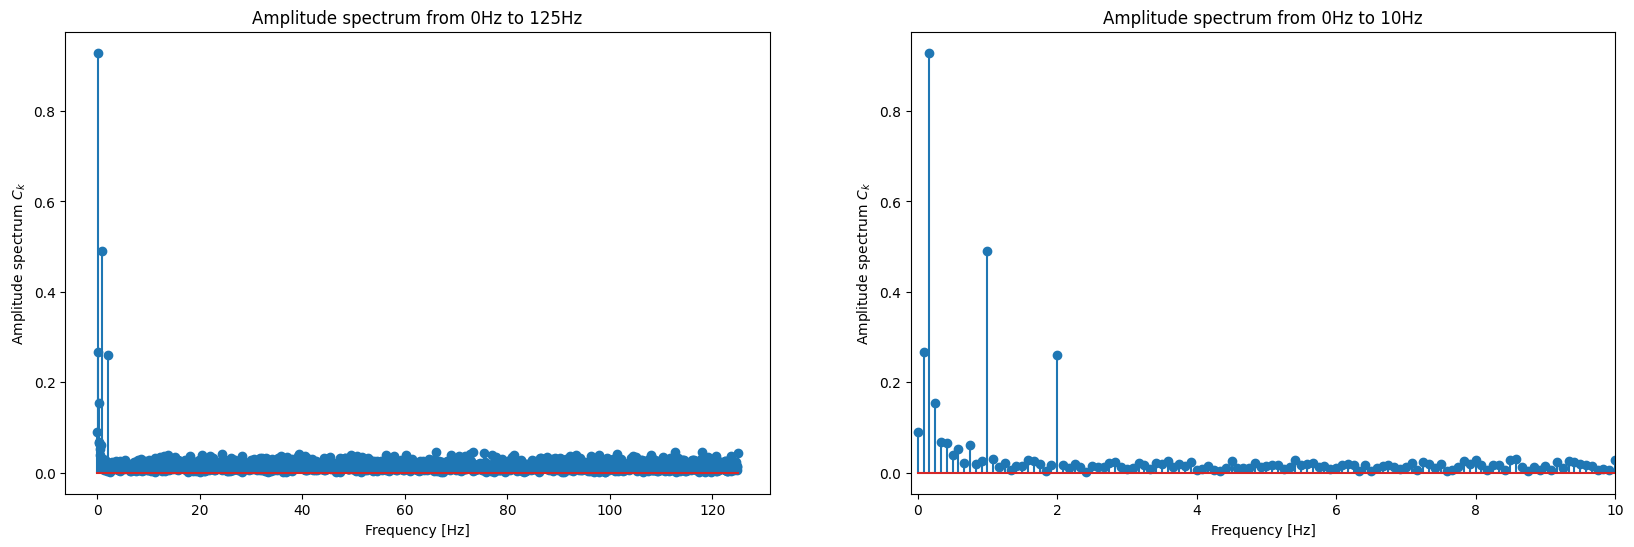

In [6]:
def compute_spectrum(y, V, scale=False):
    z = V.T@y

    z_cos = z[2::2] 
    z_sin = z[1::2]
    amp_spectrum = np.sqrt(z_cos**2 + z_sin**2)
    amp_spectrum = np.hstack((np.abs(z[0]), amp_spectrum))
    
    if scale:
        N = len(y)
        scales = np.ones(len(amp_spectrum))
        scales[0] = 1
        scales[1:] = np.sqrt(2)
        
        scales = scales/np.sqrt(N)

        return scales*amp_spectrum
    else:
        return amp_spectrum


amplitude_spectrum = compute_spectrum(y, V, scale=True)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.stem(freqs, amplitude_spectrum)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude spectrum $C_k$')
plt.title('Amplitude spectrum from 0Hz to 125Hz')

plt.subplot(1, 2, 2)
plt.stem(freqs, amplitude_spectrum)
plt.xlim(-0.1, 10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude spectrum $C_k$')
plt.title('Amplitude spectrum from 0Hz to 10Hz')

### Exercise 4: Low-pass and high-pass filtering

As we have learned, we can use the frequency domain to remove certain frequencies from a signal. In this exercise we will look at how to remove frequencies above (low-pass) and below (high-pass) a certain threshold. Think of the names in terms of what frequencies they keep in the signal, high keeps high and low keeps low.

**1. Use the frequency domain to implement a low pass filter to remove the higher frequencies**
*The higher frequencies are often just noise, as is the case here where our actual signal consists of a few specific lower frequencies*

In [7]:
def low_pass_filter(cutoff_lowpass):
    # define mask for amplitude spectrum
    spec_lowpass_mask = freqs < cutoff_lowpass
    
    # convert to z representation
    z_lowpass_mask = np.zeros(N)
    for k in range(1, n_pairs):
        z_lowpass_mask[2*k] = spec_lowpass_mask[k]
        z_lowpass_mask[2*k-1] = spec_lowpass_mask[k]    
    z_lowpass_mask[0] = spec_lowpass_mask[0]
    
    # perform the filtering in the frequency domain
    z_lp = z*z_lowpass_mask
    
    # map back to time-domain representation
    y_lp = V@z_lp
    
    # Return the mask for plotting purposes
    return spec_lowpass_mask, y_lp

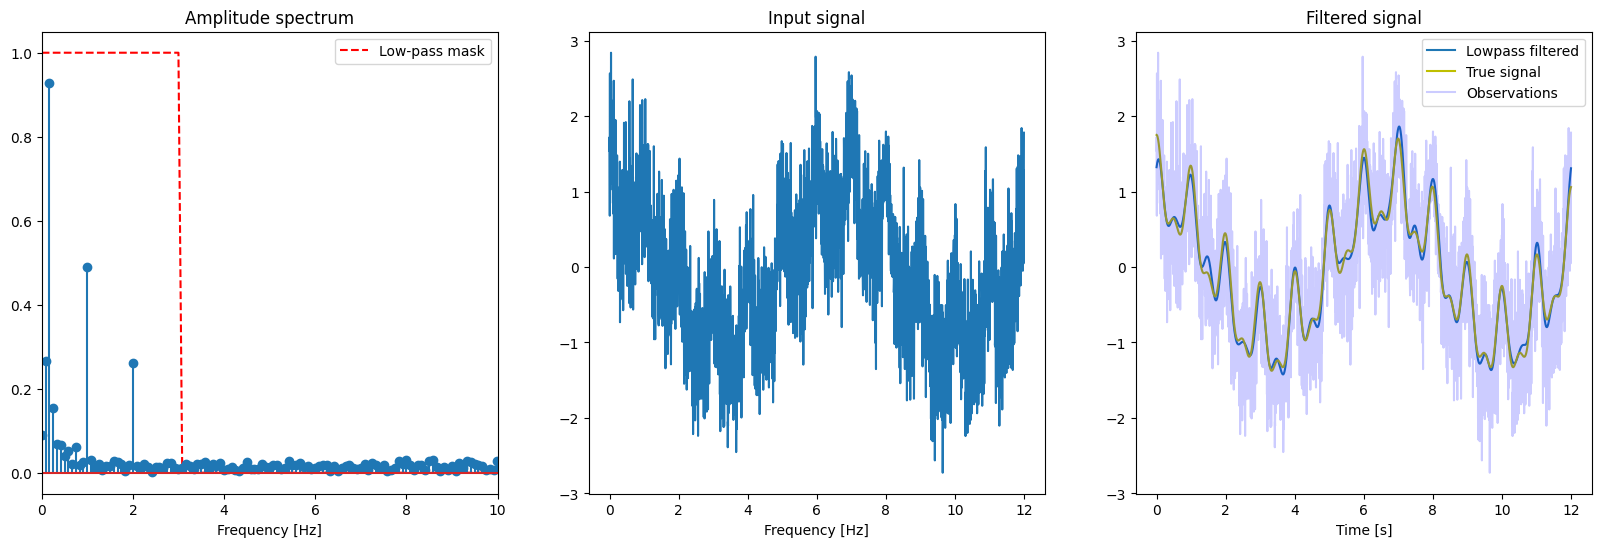

In [8]:
# cut-off frequencies for low-pass filter
cutoff_lowpass = 3

spec_lowpass_mask, y_lp = low_pass_filter(cutoff_lowpass=cutoff_lowpass)

# plot the results
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.plot(freqs, spec_lowpass_mask, label='Low-pass mask', color='r', linestyle='--')
plt.stem(freqs, compute_spectrum(y, V, scale=True))
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.xlim(0, 10)
plt.title('Amplitude spectrum')

plt.subplot(1, 3, 2)
plt.plot(ts, y, label='Observations $y_i$')
plt.xlabel('Frequency [Hz]')
plt.title('Input signal')

plt.subplot(1, 3, 3)
plt.plot(ts, y_lp, label='Lowpass filtered')
plt.plot(ts, f, 'y', label='True signal')
plt.plot(ts, y, 'b', label='Observations', alpha=0.2)
plt.xlabel('Time [s]')
plt.legend()
plt.title('Filtered signal');


**2. Experiment with the different cut-off frequencies for the filter. What happens if you choose the cut-off to be $0.5$Hz or $10Hz?$**

Removing the frequencies that we know are pure noise should have resulted in a signal closer to the original 

**3. In order to quantify the improvement we have obtained using our filter, compute the error before and after filtering:**

In [9]:
print('Error using raw signal:\t\t%3.2f' % np.sum((y-f)**2))
print('Error using filtered signal:\t%3.2f' % np.sum((y_lp-f)**2))

Error using raw signal:		756.74
Error using filtered signal:	21.74


**4. What is the optimal cut-off frequency, i.e. the cut-off the gives the smallest error? (Optional)\*.**
*Here we suggest you calculate the error for all cut-offs and find the minimum*


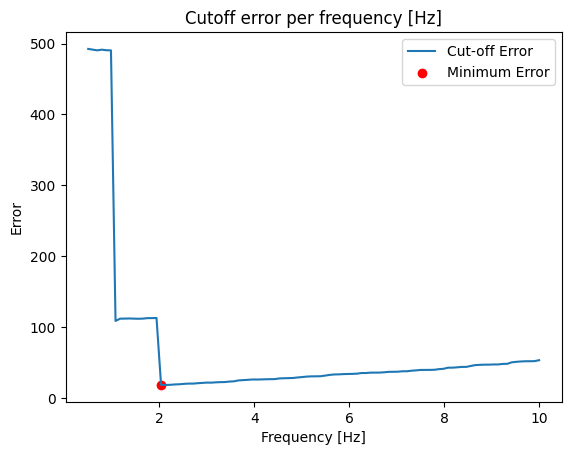

In [36]:
errors = []
cutoff_range = np.linspace(0.5, 10, 100)
for cutoff in cutoff_range:
    _, y_lp_filtered = low_pass_filter(cutoff_lowpass=cutoff)
    accuracy = np.sum((f - y_lp_filtered) ** 2)
    errors.append(accuracy)

plt.plot(cutoff_range, errors, label='Cut-off Error')
plt.title('Cutoff error per frequency [Hz]')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Error')
plt.scatter(cutoff_range[np.argmin(errors)], np.min(errors), label='Minimum Error', color='r', )
plt.legend()
plt.show()

**5. Implement high pass filtering**

In [31]:
# specify cut-off frequency for the high-pass filter
def highpass_filter(cutoff_highpass):
    spec_highpass_mask = 1.0*(freqs > cutoff_highpass)
    z_highpass_mask = np.zeros(N)
    for k in range(1, n_pairs):
        z_highpass_mask[2*k] = spec_highpass_mask[k]
        z_highpass_mask[2*k-1] = spec_highpass_mask[k]
    z_highpass_mask[0] = spec_highpass_mask[0]
    
    
    # filter
    z_hp = z*z_highpass_mask
    y_hp = V@z_hp
    return spec_highpass_mask, y_hp

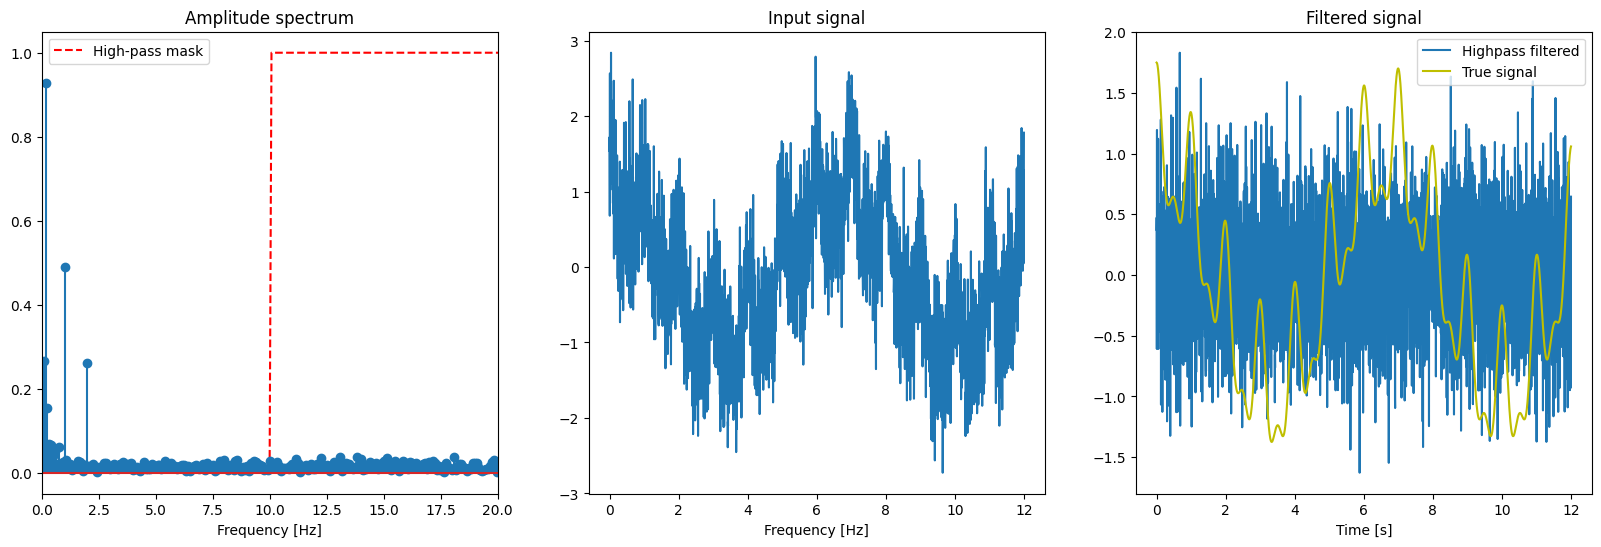

In [37]:
cutoff_highpass = 10
spec_highpass_mask, y_hp = highpass_filter(cutoff_highpass=cutoff_highpass)

plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
plt.plot(freqs, spec_highpass_mask, label='High-pass mask', color='r', linestyle='--')
plt.stem(freqs, compute_spectrum(y, V, scale=True))
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.xlim(0, 20)
plt.title('Amplitude spectrum')

plt.subplot(1, 3, 2)
plt.plot(ts, y, label='Observations $y_i$')
plt.xlabel('Frequency [Hz]')
plt.title('Input signal')

plt.subplot(1, 3, 3)
plt.plot(ts, y_hp, label='Highpass filtered')
plt.plot(ts, f, 'y', label='True signal')
plt.xlabel('Time [s]')
plt.legend()
plt.title('Filtered signal');
